In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d # 3D plotting
import numpy as np

In [16]:
##Functions
def merge(t1,t2):
    if t1==[]:
        return t2
    if t2==[]:
        return t1
    a=t1[0]
    b=t2[0]
    if a<=b:
        return [a]+merge(t1[1:],t2)
    else:
        return [b]+merge(t1,t2[1:])
    
def mergesort(L):
    if len(L)<=1:
        return L
    a=len(L)
    return merge(mergesort(L[:(a//2)]),mergesort(L[a//2:]))

#====================================

def sigmoid(x):
    return 1/(1+np.exp(-x+5))

def characteristic(X):
    L=[]
    for k in X:
        if k!=0:
            L+=[1]
        else:
            L+=[0]
    return L

def activation(X):
    return np.tanh(X/10)

def identity(X):
    return X

def derivatedactivation(X):
    return (1/10)*(1-np.tanh(X/10)**2)

#====================================
#Logical functions
def minus(L1,L2): #return A(union)B - A(inter)B
    elem=[]
    for k in L1:
        if k not in L2:
            elem+=[k]
    for k in L2:
        if k not in L1:
            elem+=[k]
    return mergesort(elem)

def intersection(L1,L2): #A(inter)B
    elem=[]
    for k in L1:
        if k in L2:
            elem+=[k]
    return mergesort(elem)

def UNION(L1,L2):
    return mergesort(minus(L1,L2)+intersection(L1,L2))

def NO(LIST,LDE):
    L=[]
    for k in LDE:
        if k not in LIST:
            L+=[k]
    return L

def ZEROinvolveTRUE(k):
    if k==0: return True
    else: return False

In [17]:
#====================================
#Functions for data processing

#Supression of duplicates and adding weights
def SUPOID(cocomplete):
    En=[[k[0],k[1],k[2],True] for k in cocomplete]
    Nbt=[]
    for k in range(len(En)):
        LiL=En[k][2]
        for i in range(k+1,len(En)):
            if [En[k][0],En[k][1]]==[En[i][0],En[i][1]] and En[k][3]:
                LiL+=En[i][2]
                En[i][3]=False
        En[k][2]=LiL

        Nbt+=[LiL]
    Final=[]
    for k in En:
        if k[3]:
            Final+=[k[:3]]
    return Final

def woduplicate(LIST): 
    L=[]
    for k in LIST:
        if k not in L:
            L+=[k]
    return mergesort(L)

#====================================

#function to go from a list to another
def nextlayer(L,connectom): # next activated layer
    L2=[]
    for k in range(len(L)):
        for i in range(len(connectom)):
            if L[k]==connectom[i][0] and connectom[i][2]!=0:
                if connectom[i][1] not in L2:
                    L2+=[connectom[i][1]]
    return mergesort(L2)

def precedentlayer(L,connectom): 
    L2=[]
    for k in range(len(L)):
        for i in range(len(connectom)):
            if L[k]==connectom[i][1] and connectom[i][2]!=0:
                if connectom[i][0] not in L2:
                    L2+=[connectom[i][0]]
    return mergesort(L2)

def indexLDE(ADLA,LDE): # Index of an element in a list
    for k in range(len(LDE)):
        if ADLA==LDE[k]:
            return int(k)
        
def nomLDE(COLUMN,LDE): # return the list of names where the index is different from 0
    L=[]
    for k in range(len(COLUMN)):
        if COLUMN[k]!=0:
            L+=[LDE[k]]
    return L

def Xneu(list,LDE): # return a line matrix with 1 for a neuron of the list 0 otherwise
    L=[0 for k in LDE]
    for k in list:
        L[int(indexLDE(k,LDE))]=1
    return L


In [18]:
#====================================
def nwCONNECTOME(Xremove,cocomplete): # Delete the links of the neurons in Xremove
    compt=0
    nwconnec=[[k for k in x] for x in cocomplete]
    for k in Xremove:
        for i in nwconnec:
            if k==i[0] or k==i[1]:
                i[2]=0
                compt+=1
    print('suppression of '+str(compt)+'/'+str(len(cocomplete))+' links between neurons')
    return nwconnec


def nwLDE(nwCONNECTOME): # return the sorted list of connected elements
    L=[]
    for k in nwCONNECTOME:
        if k[2]!=0:
            L+=[k[0],k[1]]
    return woduplicate(L)

#====================================
#functions for quantitative analysis
#return the total number of connections leaving or entering the list of neurons ADLA
def totalnumber(ADLA,connectome):
    L=[]
    for k in ADLA:
        for i in connectome:
            if k==i[0] or k==i[1]:
                L+=[i[2]]
    return np.sum(L)

#return the number of different connections leaving or entering the list of neurons ADLA
def nbrdiff(ADLA,connectome):
    A=precedentlayer(ADLA,connectome)
    B=nextlayer(ADLA,connectome)
    return len(A)+len(B)

#return the list of the number of different connections and connections to each neuron
def ClassementNeurons(L,connectome):
    A=[]
    B=[]
    for k in L:
        A+=[[nbrdiff([k],connectome),totalnumber([k],connectome),k]]
        A=mergesort(A)
    for k in range(len(A)):
        B+=[[A[len(A)-1-k][2],A[len(A)-1-k][0],A[len(A)-1-k][1]]]
    return B


#====================================
# table generation
def table(List,connectome,function):
    A=[List]
    Local=[k for k in List]
    for k in range(20):
        Local=function(Local,connectome)
        if Local==[]:
            return A, len(A)
        else:
            if Local in A:
                return A, len(A)
            A+=[Local]
    return A, '>20'

def TableNwLayer(ADLA,cocomplete): #send all the elements then the corresponding layers
    A=[]
    layers=[]
    B=ADLA
    for k in range(20):
        if B!=[]:
            nwlayer=[]
            for i in B:
                if i not in A:
                    A+=[i]
                    nwlayer+=[i]
            if nwlayer!=[]:
                if nwlayer in layers:
                    return A,layers
                layers+=[nwlayer]
            B=nextlayer(B,cocomplete)
    return A,layers

#return the number of layers for each neuron in Liste
def tablestudy(List,connectome,function):
    A=[]
    for k in List:
        A+=[[k,len(table([k],connectome,function)[0])-1]]
        compt+=1
        print(compt,'/',len(List))
    A=mergesort(A)
    return [[k[1],k[0]] for k in A ]

In [22]:
#====================================
#For neural network
#return the matrix of connections
def matrixcomplete(LDE,connec):
    TAB=np.array([[0 for k in range(len(LDE))] for i in range(len(LDE))])
    ci=[[indexLDE(k[0],LDE),indexLDE(k[1],LDE),int(k[2])] for k in connec]
    for k in ci:
        TAB[k[1],k[0]]=k[2]
    return TAB


def propagation_of_activation(ENTREE,EXIT,MATRIX,LDE,cocomplete,activation):
    N=table(ENTREE,cocomplete,nextlayer)[1] 
    if N=='>20': return 'incomplete: more than 20 steps are needed to propagate the stimulation completely'
    elif N==1: return "send to no neuron"
    ENTREE=mergesort(ENTREE)
    EXIT=mergesort(EXIT)
    X=[k for k in ENTREE]
    layer=Xneu(ENTREE,LDE)
    intermed=[[k,0,ZEROinvolveTRUE(k)] for k in Xneu(ENTREE,LDE)]
    for k in range(N-1): 
        layer=activation(np.dot(MATRIX,layer)) 
        X=UNION(X,nextlayer(X,cocomplete)) 
        for t in range(len(intermed)):
            if intermed[t][2]:
                intermed[t][1]+=1 
                intermed[t][0]=layer[t]
            inter=intersection(X,EXIT) 
            if inter!=[]:
                if inter!=EXIT:
                    for i in inter:
                        ind=indexLDE(i,LDE)
                        if intermed[ind][2]:
                            intermed[ind][2]=False 
                else:
                    print(str(k+1)+'/'+str(N-1))
                    return [[LDE[indexLDE(k,LDE)],layer[indexLDE(k,LDE)]]+intermed[indexLDE(k,LDE)][:2] for k in EXIT] 
    print('total:'+ str(N-1)+' steps of propagation')
    return [[LDE[indexLDE(k,LDE)],layer[indexLDE(k,LDE)]]+intermed[indexLDE(k,LDE)][:2] for k in EXIT] 

def influence(listesup,ENTREE,EXIT,LDE,cocomplete,characteristic):
    MATRICE=matrixcomplete(LDE,cocomplete)
    ETATfinal=propagation_of_activation(ENTREE,EXIT,MATRICE,LDE,cocomplete,characteristic)
    LISTEDESNOMS=[k[0] for k in ETATfinal]
    COLONNE=[k[1] for k in ETATfinal]
    nvconnec=nwCONNECTOME(listesup,cocomplete)
    nvMATRICE=matrixcomplete(LDE,nvconnec)
    nvETATfinal=propagation_of_activation(ENTREE,EXIT,nvMATRICE,LDE,cocomplete,characteristic)
    nvCOLONNE=[k[1] for k in nvETATfinal]
    return [[LISTEDESNOMS[k],COLONNE[k]-nvCOLONNE[k]] for k in range(len(EXIT))]

def study_influence(ListofLdelete,ENTREE,EXIT,LDE,cocomplete,characteristic):
    RESULT=[]
    compt=0
    N=len(ListofLdelete)
    for i in ListofLdelete:
        B=[]
        A=influence(i,ENTREE,EXIT,LDE,cocomplete,characteristic)
        for k in A:
            if k[1]!=0:
                B+=[k]
        if B!=[]:
            RESULT+=[i+B]
        compt+=1
        print(compt,'/',N,' steps')
    return RESULT


In [20]:
#====================================
#VISUALIZATION

cocomplete=[] #useless

def coordRECT(L,ADLA):
    A=0
    N=int(np.trunc(np.sqrt(len(L))))+1
    for k in range(len(L)):
        if L[k]==ADLA:
            A=k
    return [A//N,N-1-A%N]

def coo(ADLA,coord):
    for k in coord:
        if k[0]==ADLA:
            return [k[1],k[2]]
    
def coo3D(ADLA,coord):
    for k in coord:
        if k[0]==ADLA:
            return [k[1],k[2],k[3]]

def VISUALRECT(LIST,L,cocomplete):
    N=int(np.trunc(np.sqrt(len(L))))+1
    X=np.linspace(0,N-1,N)
    for k in range(N):
        plt.plot(X[k:],X[k:]-k,'.', color='black',markersize=7) 
        plt.plot(X[:k],X[:k]-k+N,'.', color='black', markersize=7) 

    for k in LIST:
        plt.plot(coordRECT(L,k)[0],coordRECT(L,k)[1],'.',color='blue',markersize=14)
    for j in LIST:
        envoie=nextlayer([j],cocomplete)
        for k in envoie:
            plt.plot([coordRECT(L,j)[0],coordRECT(L,k)[0]],[coordRECT(L,j)[1],coordRECT(L,k)[1]],linewidth=2/(2+np.log(len(LIST)))) 
    plt.ylim(-1, N)
    plt.xlim(-1, N)
    plt.show()

def VISUALcircle(ADLA):
    ESSAY=[]
    TNC,couches=TableNwLayer(ADLA,cocomplete)
    for k in couches:
        ESSAY+=[len(k)]
    X=[]
    Y=[]
    for k in range(len(ESSAY)):
        X+=[(k+(i%3)/10)*np.cos(i*2*np.pi/(ESSAY[k])+np.pi/2) for i in range(ESSAY[k])]
        Y+=[(k+(j%3)/10)*np.sin(j*2*np.pi/(ESSAY[k])+np.pi/2) for j in range(ESSAY[k])]
    plt.plot(X,Y,'.',color='black',markersize=10) #position of neurons
    coord=[]
    for k in range(len(TNC)):
        coord+=[[TNC[k],X[k],Y[k]]] 
    for j in range(len(TNC)):
        envoie=intersection(nextlayer([TNC[j]],cocomplete),TNC[j+1:])
        for k in envoie:
            plt.plot([coo(TNC[j],coord)[0],coo(k,coord)[0]],[coo(TNC[j],coord)[1],coo(k,coord)[1]],linewidth=0.3)
    plt.axis('scaled')
    plt.title(str(ADLA)+str(ESSAY[1:])+' '+"number of layers: "+str(len(ESSAY)-1))
    plt.ylim(-(len(ESSAY)-0.5), len(ESSAY)-0.5)
    plt.xlim(-(len(ESSAY)-0.5), len(ESSAY)-0.5)
    plt.show()

def VISUALcircle3D(ADLA):
    ESSAY=[]
    TNC,layers=TableNwLayer(ADLA,cocomplete)
    for k in layers:
        ESSAY+=[len(k)]
    X=[]
    Y=[]
    Z=[]
    for k in range(len(ESSAY)):
        X+=[(k+(i%3)/10)*np.cos(i*2*np.pi/(ESSAY[k])+np.pi/2) for i in range(ESSAY[k])]
        Y+=[(k+(j%3)/10)*np.sin(j*2*np.pi/(ESSAY[k])+np.pi/2) for j in range(ESSAY[k])]
        Z+=[k for j in range(ESSAY[k])]
    ax.scatter(X,Y,Z,color='black') #position of neurons
    coord=[]
    for k in range(len(TNC)):
        coord+=[[TNC[k],X[k],Y[k],Z[k]]]
    compt=0
    for j in range(len(TNC)):
        envoie=intersection(nextlayer([TNC[j]],cocomplete),TNC[j+1:])
        for k in envoie:
            compt+=1
            ax.plot([coo3D(TNC[j],coord)[0],coo3D(k,coord)[0]],[coo3D(TNC[j],coord)[1],coo3D(k,coord)[1]],[coo3D(TNC[j],coord)[2],coo3D(k,coord)[2]],linewidth=0.2)
    print(ESSAY)
    plt.title(str(ADLA)+str(ESSAY[1:])+' '+"number of steps: "+str(len(ESSAY)-1))
    plt.show()

In [23]:
##====================Mise en forme des données====================
connectcsv=open(r'.\CElegansConnectome.csv', 'r')
NeToMucsv=open(r'.\CElegansNeuronsToMuscle.csv', 'r')
Sensorycsv=open(r'.\CElegansSensory.csv', 'r')
connecttxt = connectcsv.readlines()
NeToMutxt = NeToMucsv.readlines()
Sensorytxt = Sensorycsv.readlines()
connectcsv.close()
NeToMucsv.close()
Sensorycsv.close()
connectome = []
for i in connecttxt:
    connectome.append(i.split(';'))
for k in range(1,len(connectome)):
    connectome[k][3]=int(connectome[k][3])
NeToMu = []
for i in NeToMutxt:
    NeToMu.append(i.split(';'))
for k in range(1,len(NeToMu)):
    NeToMu[k][2]=int(NeToMu[k][2])
Sensory = []
for i in Sensorytxt:
    Sensory.append(i.split(';'))
#LISTS OF DATA
cosimple=[[k[0],k[1],k[3]] for k in connectome][1:]
NMsimple=[[k[0],k[1],k[2]] for k in NeToMu][1:]
# Usefull lists
sensimple=woduplicate([k[0] for k in Sensory][1:]) # list of sensors
muscles=woduplicate([k[1] for k in NeToMu][1:]) #list of muscles
NVM=woduplicate([k[0] for k in NMsimple]) #list of neurons sending to muscles
A1=[k[0] for k in cosimple] # list of neurons sending to other neurons
A2=[k[1] for k in cosimple] # list of neurons receiving from other neurons
cocomplete=SUPOID(cosimple+NMsimple) #len()=3683 the list of all the connections
LDE=nwLDE(cocomplete) #len()=397 the list of all the connected elements
MATRIX=matrixcomplete(LDE,cocomplete)
#TABLE,lengthofTABLE=table(LDE,cocomplete,nextlayer) # len = 2 (397, 392)

#ranking of neurons
ranking=ClassementNeurons(LDE,cocomplete)
ListDelete=[k[0] for k in ranking]
##Result of propagation
MATRIX=matrixcomplete(LDE,cocomplete)
print(np.array(propagation_of_activation(['AVAL'],LDE,MATRIX,LDE,cocomplete,characteristic)))
##To get the modified neurons between two connectomes
LISTEtoDELETE=['AVAR','AVAL','DVC','M2L']
#print('nombre de neurones retirés: '+str(len(LISTEaENLEVER)))
A=influence(LISTEtoDELETE,sensimple,LDE,LDE,cocomplete,characteristic)
B=[]
for k in A:
    if k[1]!=0:
        B+=[k]
print(B)

total:4 steps of propagation
[['ADAL' '1' '1' '2']
 ['ADAR' '1' '0' '1']
 ['ADEL' '1' '0' '1']
 ...
 ['VD7' '1' '0' '1']
 ['VD8' '1' '0' '1']
 ['VD9' '1' '0' '1']]
total:3 steps of propagation
suppression of 319/3683 links between neurons
total:3 steps of propagation
[['AS8', 1], ['AVAL', 1], ['AVAR', 1], ['DA7', 1], ['DVC', 1]]


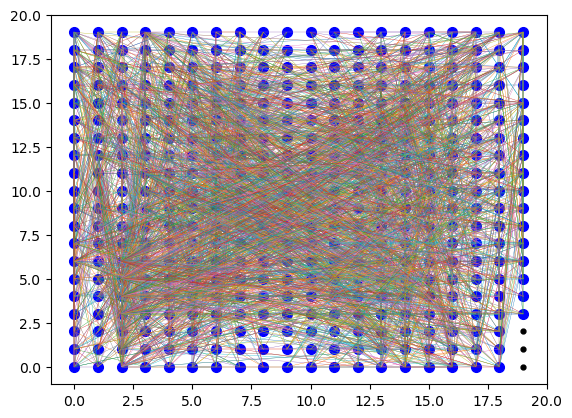

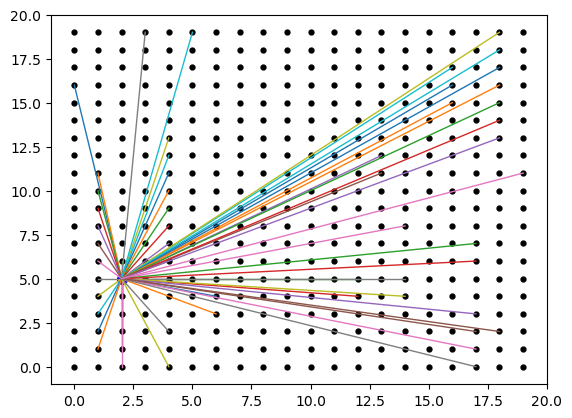

In [24]:
##====================================
##-------------- VISUALS
##====================================
## Rectangle
VISUAL1=VISUALRECT(LDE,LDE,cocomplete)
VISUALsens=VISUALRECT(['AVAR'],LDE,cocomplete)

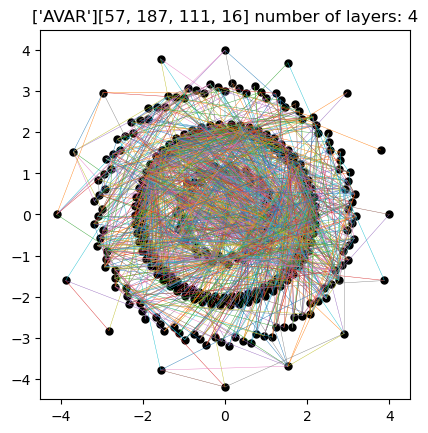

In [25]:

##VISUALIZATION CIRCLE 2D
cercleAVAR=VISUALcircle(['AVAR']) 

[1, 57, 187, 111, 16]


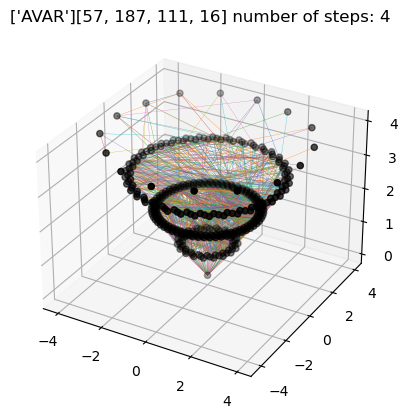

In [26]:
##VISUALIZATION circle 3D
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
cercleAVAR=VISUALcircle3D(['AVAR']) 